# SD212: Graph mining

## Project

### Title: ___

### Students: ___

The objective of this project is to learn how to extract useful information from graph data. 

Your task is the following:
* build your own graph from real data
* specify the problem(s) you would like to solve
* provide a solution
* visualize the results

## Instructions

You can work in **teams of 2 or 3**.

Fill the following variable with the names of all students of this project separated by _:

In [119]:
name = 'toto_titi_tata'

You **must** use this name for the pickle file of your dataset and provide a link to this file:

In [120]:
# url to your dataset, to be modified
url = 'https://nextcloud.r2.enst.fr/nextcloud/index.php/s/RTGFHLrjsGQ4pqr'

Check the notebook ``my_dataset`` to generate a pickle file in appropriate format (``Bunch`` object).

You must use the following name for your notebook:

In [121]:
# name of your notebook
name + '.ipynb'

'toto_titi_tata.ipynb'

## Data

In [122]:
import pickle

In [123]:
# you need to download data first (see the above url)
with open(name, 'br') as f:
    dataset = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'toto_titi_tata'

In [ ]:
dataset

Describe your data and how it has been collected (do not include the code used to extract data).

## Problem

Describe the problem you want to solve (be concise).

## Solution

Describe your solution, including the code and a visualization of the results.

In [124]:
import numpy as np
from sknetwork.data import from_edge_list
from sknetwork.visualization import svg_graph, svg_bigraph
import csv
from IPython.display import SVG

In [126]:
with open('data/anime.csv', mode = 'r') as file:
    data = csv.reader(file, delimiter = ',', quotechar = '"')
    anime = [i for i in data]
anime = np.asarray(anime)

In [127]:
with open('data/rating.csv', mode = 'r',encoding = 'utf-8') as file:
    data = csv.reader(file, delimiter = ',', quotechar = '"')
    rating = [i for i in data]
rating = np.asarray(rating)

In [128]:
rating.shape

(18751, 3)

In [131]:
rating

array([['username', 'anime_id', 'rating'],
       ['Lachawla', '1', '-1'],
       ['Dubba', '1', '9'],
       ...,
       ['bilwor', '9969', '-1'],
       ['JezusAntychryst', '9969', '-1'],
       ['Ragnarok82', '9969', '-1']], dtype='<U16')

In [152]:
index = np.random.choice(rating.shape[0]-1,min(rating.shape[0]-1,1000000),replace = False)

In [153]:
sampled_ratings = np.array((rating[1:])[index])

In [154]:
sampled_ratings

array([['Stillx2', '33095', '-1'],
       ['KVII', '35180', '-1'],
       ['Glordit', '48569', '8'],
       ...,
       ['Ampcrazy', '32281', '10'],
       ['Wayrrozz', '9253', '-1'],
       ['FredPanda', '43608', '-1']], dtype='<U16')

array(['10', '-1', '10', '-1', '10', '-1', '7', '10', '-1', '-1'],
      dtype='<U16')

In [155]:
rating_positive = sampled_ratings[np.asarray(sampled_ratings[:,2],dtype=int)>0]

In [156]:
rating_positive


array([['Glordit', '48569', '8'],
       ['undefineable_1', '35180', '7'],
       ['MansehajMSR', '32935', '9'],
       ...,
       ['mulacrelkcah', '1575', '8'],
       ['AriayaCH', '45576', '9'],
       ['Ampcrazy', '32281', '10']], dtype='<U16')

In [157]:
graph = from_edge_list(rating_positive,bipartite = True)

In [158]:
graph

{'names_row': array(['--Flow--', '--Kiri--', '-Akimi-', ..., 'zushimomo', 'zybactik',
        'zyxalex'], dtype='<U16'),
 'names': array(['--Flow--', '--Kiri--', '-Akimi-', ..., 'zushimomo', 'zybactik',
        'zyxalex'], dtype='<U16'),
 'names_col': array(['1', '11061', '15335', '15417', '1575', '17074', '19', '199',
        '21939', '245', '24701', '263', '28851', '28977', '2904', '2921',
        '31758', '32281', '32935', '33050', '33095', '34096', '35180',
        '35247', '36838', '37491', '37510', '37521', '37987', '38524',
        '39486', '40028', '40682', '4181', '42938', '43608', '44', '44074',
        '45576', '46102', '47778', '48569', '48583', '50160', '50265',
        '5114', '820', '918', '9253', '9969'], dtype='<U16'),
 'biadjacency': <5048x50 sparse matrix of type '<class 'numpy.intc'>'
 	with 7677 stored elements in Compressed Sparse Row format>}

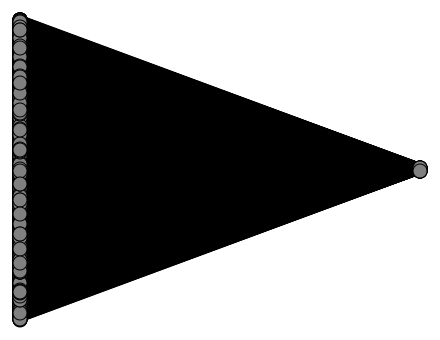

In [159]:
biadjacency = graph.biadjacency
image = svg_bigraph(biadjacency)
SVG(image)

In [163]:
len(np.unique(sampled_ratings[:,0]))

11249

In [164]:
len(np.unique(sampled_ratings[:,1]))

50

In [178]:
anime_degrees = biadjacency.T.dot(np.ones(biadjacency.shape[0]))

array([1238., 1434., 1446., 1339., 1421., 1271., 1068., 2076.,  864.,
       1266., 1049., 1224., 2215., 1175., 1561., 1216., 1800., 2105.,
       1897., 1690.,  844., 1210., 1208., 1495., 1235., 1197., 1640.,
       1366., 1816., 2014., 1390., 1779., 1511., 1310., 1515., 1151.,
       1284., 1022., 1721., 1127., 1989., 1659., 2108.,  928., 1330.,
       1411.,  898., 1108., 1253., 1213.])

In [180]:
user_degrees = biadjacency.dot(np.ones(biadjacency.shape[1]))


In [181]:
np.mean(user_degrees)

14.082210776545166

In [182]:
np.median(user_degrees)

9.0